## 자연어 처리 딥러닝
# RNN (순환신경망) 과 LSTM

- 연속된 데이터 묶음을 처리한다.
- 하나의 데이터 묶음은 순서를 가진다. (앞과 뒤를 구분)
- 이러한 데이터 묶음을 시퀀스(Sequence) 또는 시계열데이터 라고 한다.
- 연속된 단어들로 이루어진 문장, 몇일 간의 종가로 이루어진 주식 가격 등
- RNN : Recurrent Neural Network

<img src='rnn.jpg' />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### Imdb 불러오기

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\Anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
w2i = imdb.get_word_index()
len(w2i)

88584

### 문장의 단어수를 500개로 제한

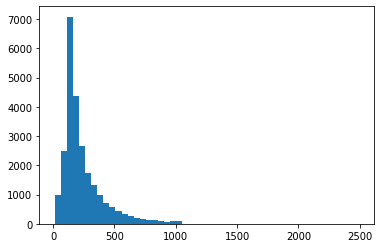

In [8]:
doc_len = [len(x) for x in X_train]
plt.hist(doc_len, bins=50)
pass

In [7]:
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=500) # 문장당 단어수가 500개를 넘기면 앞부분을 자른다
X_test = sequence.pad_sequences(X_test, maxlen=500)

- 문장의 뒤에서 단어 500개를 가져온다.
- 문장이 짧은 경우 앞부분을 0 으로 채운다.

### Sequence 개념
- 한 문장은 순차적인 단어들로 이루어져 있다.
- 이러한 연속적인 단어들로 이루어진 문장과 같은 것을 Sequence 라고 한다.
> 한 문장 : [1,31,27,5]<br>
> 한 단어 : 31 => [0,0,...,1,...,0,0]

### SimpleRNN 적용

<img src='rnn2.jpg' />

- SimpleRNN 의 디폴트 activation 은 'tanh' 이다

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [9]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                6208      
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 326,273
Trainable params: 326,273
Non-trainable params: 0
_________________________________________________________________


In [13]:
32*64 + 64*64 + 64 # SimpleRNN 가중치 수 (W*input_t + U*state_t + b)

6208

### 모델 설명
- Embedding 은 단어번호들을 입력으로 받는다.
> 10000 => 단어집의 총 단어수<br>
> 32 => 10000 차원을 32 차원으로 줄임<br>
> 500 => 한 문장에 속하는 단어수<br>
> (None,500) => (None,500,10000) => (None,500,32)
- SimpleRNN 은 연속된 단어들(Sequence)를 입력받는다.
> . (None,500,32) => 마지막 출력값 (None,64)<br>
> . SimpleRNN(64) 에서 64는 출력 차원을 의미한다.

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.6311 - acc: 0.6263 - val_loss: 0.5021 - val_acc: 0.7686
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/step - loss: 0.4182 - acc: 0.8234 - val_loss: 0.3807 - val_acc: 0.8410
Epoch 3/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.3237 - acc: 0.8704 - val_loss: 0.4322 - val_acc: 0.8038
Epoch 4/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.2570 - acc: 0.8994 - val_loss: 0.3640 - val_acc: 0.8418
Epoch 5/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2028 - acc: 0.9220 - val_loss: 0.4107 - val_acc: 0.8530
Epoch 6/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.1394 - acc: 0.9508 - val_loss: 0.3834 - val_acc: 0.8562
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.0932 - acc: 0.9688 - val_loss: 0.4231 - val_acc:

Text(6,0.87,'val_acc_max = 0.8652')

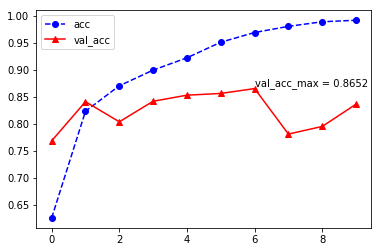

In [15]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3,0.3,'val_loss_min = 0.36401541996002196')

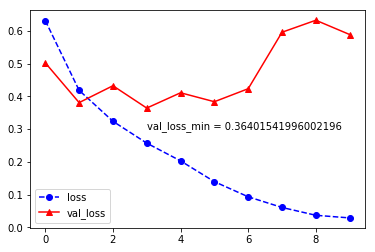

In [14]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

In [16]:
help(SimpleRNN)

Help on class SimpleRNN in module keras.layers.recurrent:

class SimpleRNN(RNN)
 |  Fully-connected RNN where the output is to be fed back to input.
 |  
 |  # Arguments
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use
 |          (see [activations](../activations.md)).
 |          Default: hyperbolic tangent (`tanh`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `a(x) = x`).
 |      use_bias: Boolean, whether the layer uses a bias vector.
 |      kernel_initializer: Initializer for the `kernel` weights matrix,
 |          used for the linear transformation of the inputs
 |          (see [initializers](../initializers.md)).
 |      recurrent_initializer: Initializer for the `recurrent_kernel`
 |          weights matrix,
 |          used for the linear transformation of the recurrent state
 |          (see [initializers](../initializers.md)).
 |      bias_initializer: Ini

### RNN 을 겹쳐서 사용하기
- return_sequence 옵션을 사용하면 각 RNN Cell 의 출력값을 반환한다.
- 이 출력값을 입력으로 받는 RNN 층을 위에 쌓을 수 있다.

<img src='rnn3.jpg' />

In [26]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(SimpleRNN(32, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16, return_sequences=True)) # return_sequences=True!!!
model.add(SimpleRNN(16))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 500, 32)           2080      
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 500, 16)           784       
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 323,409
Trainable params: 323,409
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 153s 8ms/step - loss: 0.6759 - acc: 0.5591 - val_loss: 0.5588 - val_acc: 0.7122
Epoch 2/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.4185 - acc: 0.8155 - val_loss: 0.4588 - val_acc: 0.7866
Epoch 3/10
20000/20000 [==============================] - 147s 7ms/step - loss: 0.2539 - acc: 0.8995 - val_loss: 0.4267 - val_acc: 0.8232
Epoch 4/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.1430 - acc: 0.9476 - val_loss: 0.4932 - val_acc: 0.8170
Epoch 5/10
20000/20000 [==============================] - 147s 7ms/step - loss: 0.0692 - acc: 0.9772 - val_loss: 0.5815 - val_acc: 0.8152
Epoch 6/10
20000/20000 [==============================] - 149s 7ms/step - loss: 0.0334 - acc: 0.9895 - val_loss: 0.7743 - val_acc: 0.7798
Epoch 7/10
20000/20000 [==============================] - 148s 7ms/step - loss: 0.0215 - acc: 0.9931 - val_loss: 0.7825 - v

Text(6,0.87,'val_acc_max = 0.8232')

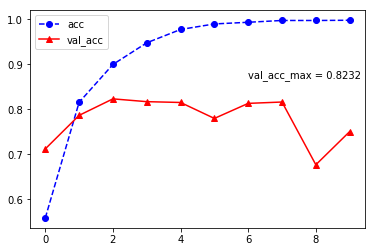

In [29]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(6,0.87,'val_acc_max = '+ str(max(h['val_acc'])))

Text(3,0.3,'val_loss_min = 0.4266521214962006')

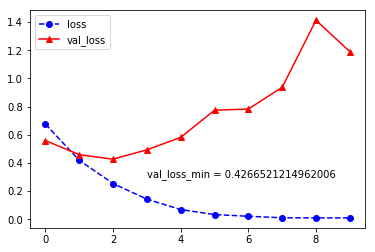

In [30]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(3,0.3,'val_loss_min = '+ str(min(h['val_loss'])))

### 그래디언트 소실 문제
- RNN 은 하나의 층에서도 반복적인 RNN Cell 을 적용하므로, 실제로는 많은 층을 거치게 된다.
- 최상위의 손실값을 조금씩 아래로 나누어 주어 기울기의 가중치를 부여하는 것이 신경망의 핵심 알고리즘인 역전파(Backpropagation) 이다.
- 층을 많이 거치므로 초기층들의 영향력은 점점 줄어들게 된다. 즉, 문장에서 처음 나오는 단어들은 거의 무시되는 경향이 생긴다.
- 이러한 문제를 Vanishing Gradient Problem 이라고 부른다.
- 그래디언트 소실 문제를 해결하기 위해 LSTM 과 GRU 가 제안되었고, SimpleRNN 은 거의 사용되지 않는다.

### LSTM 적용
- Long Short Term Memory
- 그래디언트 소실 문제(Vanishing gradient problem) 을 해결하기 위해, 이전 타임의 영향력을 좀 더 키운 것이다.
- LSTM 의 역할 => **과거 정보를 나중에 다시 주입하여 그래디언트 소실 문제를 해결**

<img src='lstm.jpg' />

In [14]:
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 261s 13ms/step - loss: 0.5016 - acc: 0.7645 - val_loss: 0.3753 - val_acc: 0.8386
Epoch 2/5
20000/20000 [==============================] - 277s 14ms/step - loss: 0.2959 - acc: 0.8839 - val_loss: 0.3281 - val_acc: 0.8592
Epoch 3/5
20000/20000 [==============================] - 263s 13ms/step - loss: 0.2293 - acc: 0.9143 - val_loss: 0.3168 - val_acc: 0.8638
Epoch 4/5
20000/20000 [==============================] - 248s 12ms/step - loss: 0.2019 - acc: 0.9252 - val_loss: 0.5797 - val_acc: 0.8234
Epoch 5/5
20000/20000 [==============================] - 259s 13ms/step - loss: 0.1731 - acc: 0.9379 - val_loss: 0.3315 - val_acc: 0.8758


Text(2.5,0.88,'val_acc_max = 0.8758')

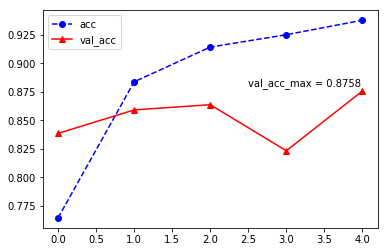

In [38]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(2.5,0.88,'val_acc_max = '+ str(max(h['val_acc'])))

Text(2,0.28,'val_loss_min = 0.3168344196796417')

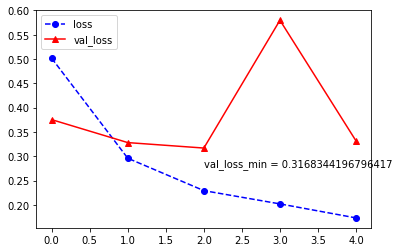

In [41]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(2,0.28,'val_loss_min = '+ str(min(h['val_loss'])))

- 결과 분석 (교재 277쪽 참고)
>- 계산 부하에 비해 썩 좋은 결과가 나오지는 않습니다.
>- 임베딩 차원을 튜닝하면 더 좋은 결과를 얻을 가능성이 크다.
>- 리뷰를 전체적으로 길게 분석하는 것(LSTM이 잘하는 일)은 리뷰 분석과 같은 감성 분류 문제에 별로 도움이 되지 않는다.
>- 이런 문제는 각 리뷰에 어떤 단어가 얼마나 나타나는 지를 보는 것이 더 나을 수 있다. (완전 연결 네트워크)
>- LSTM 에 적합한 분야 => **질문-응답과 기계 번역**

### 복수의 LSTM층

In [21]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 500, 64)           24832     
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 357,281
Trainable params: 357,281
Non-trainable params: 0
_________________________________________________________________


### 출력 모두 사용

In [15]:
from tensorflow.keras.layers import LSTM, Flatten

model = Sequential()
model.add(Embedding(10000, 32, input_length=500))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 500, 64)           24832     
_________________________________________________________________
dense_3 (Dense)              (None, 500, 1)            65        
_________________________________________________________________
flatten_2 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 345,398
Trainable params: 345,398
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/1
20000/20000 [==============================] - 426s 21ms/step - loss: 0.6334 - acc: 0.6158 - val_loss: 0.5068 - val_acc: 0.7958


### 양방향 RNN 적용
- Sequence 의 데이터를 정방향과 반대방향 두 번을 적용하여 결과를 합친다.
- 문장이라면 단어들을 거꾸로 적용하는 것이다.
- 문장 평가에는 효과가 있지만 주식 가격 변동에는 적합하지 않다. 왜 그럴까?

In [42]:
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 556s 28ms/step - loss: 0.5212 - acc: 0.7463 - val_loss: 0.3768 - val_acc: 0.8514
Epoch 2/5
20000/20000 [==============================] - 566s 28ms/step - loss: 0.2948 - acc: 0.8844 - val_loss: 0.3139 - val_acc: 0.8786
Epoch 3/5
20000/20000 [==============================] - 538s 27ms/step - loss: 0.2431 - acc: 0.9086 - val_loss: 0.3141 - val_acc: 0.8764
Epoch 4/5
20000/20000 [==============================] - 542s 27ms/step - loss: 0.2044 - acc: 0.9244 - val_loss: 0.3113 - val_acc: 0.8630
Epoch 5/5
20000/20000 [==============================] - 539s 27ms/step - loss: 0.1786 - acc: 0.9353 - val_loss: 0.4695 - val_acc: 0.8600


Text(2.5,0.88,'val_acc_max = 0.8786')

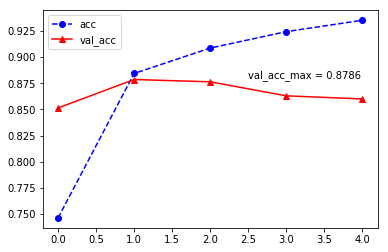

In [45]:
h = history.history
plt.plot(h['acc'], 'bo--')
plt.plot(h['val_acc'], 'r^-')
plt.legend(['acc', 'val_acc'])
plt.text(2.5,0.88,'val_acc_max = '+ str(max(h['val_acc'])))

Text(2,0.28,'val_loss_min = 0.3112912193775177')

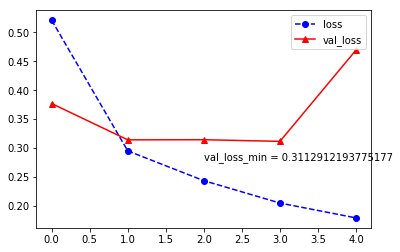

In [46]:
plt.plot(h['loss'], 'bo--')
plt.plot(h['val_loss'], 'r^-')
plt.legend(['loss', 'val_loss'])
plt.text(2,0.28,'val_loss_min = '+ str(min(h['val_loss'])))

In [1]:
help(LSTM)

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Help on class LSTM in module keras.layers.recurrent:

class LSTM(RNN)
 |  Long Short-Term Memory layer - Hochreiter 1997.
 |  
 |  # Arguments
 |      units: Positive integer, dimensionality of the output space.
 |      activation: Activation function to use
 |          (see [activations](../activations.md)).
 |          Default: hyperbolic tangent (`tanh`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `a(x) = x`).
 |      recurrent_activation: Activation function to use
 |          for the recurrent step
 |          (see [activations](../activations.md)).
 |          Default: hard sigmoid (`hard_sigmoid`).
 |          If you pass `None`, no activation is applied
 |          (ie. "linear" activation: `a(x) = x`).
 |      use_bias: Boolean, whether the layer uses a bias vector.
 |      kernel_initializer: Initializer for the `kernel` weights matrix,
 |          used for the linear transformation of the inputs.
 |          (see [initializ

### Conv1D
- 시퀀스를 높이가 없는 이미지로 생각하여 구간 윈도우 상에서 패턴을 찾아낸다.
- (높이, 넓이, 채널) => (단어, 임베딩차원)
- 긴 시퀀스에서 특정 패턴을 찾아내는 데 효과가 크고, RNN에 비해 속도가 빠르다.
- Conv1D, MaxPooling1D, GlobalMaxPooling1D 등 사용